>># Traffic analysis and  Comprehensive Machine learning project using classical techniques and nueral networks

# step 1
## Read the data from Csv file , Take a a look at the structure

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import joblib

file_name=r'C:\Users\DELL\Downloads\AI\Traffic.csv'
Traffic=pd.read_csv(file_name)
Traffic.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31.0,0.0,4.0,4.0,39,low
1,12:15:00 AM,10,Tuesday,49.0,0.0,3.0,3.0,55,low
2,12:30:00 AM,10,Tuesday,46.0,0.0,3.0,6.0,55,low
3,12:45:00 AM,10,Tuesday,51.0,0.0,2.0,5.0,58,low
4,1:00:00 AM,10,Tuesday,57.0,6.0,15.0,16.0,94,normal


# The data contains 8 features , 1 target (label) with a 2976 sample

In [2]:
Traffic.info()
Traffic.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               2976 non-null   object 
 1   Date               2976 non-null   int64  
 2   Day of the week    2976 non-null   object 
 3   CarCount           2973 non-null   float64
 4   BikeCount          2973 non-null   float64
 5   BusCount           2974 non-null   float64
 6   TruckCount         2969 non-null   float64
 7   Total              2976 non-null   int64  
 8   Traffic Situation  2976 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 209.4+ KB


(2976, 9)

# Take a look at the categorical features (3 features)

In [3]:
Traffic['Traffic Situation'].value_counts()

Traffic Situation
normal    1669
heavy      682
high       321
low        304
Name: count, dtype: int64

In [4]:
Traffic['Day of the week'].value_counts()

Day of the week
Tuesday      480
Wednesday    480
Thursday     480
Friday       384
Saturday     384
Sunday       384
Monday       384
Name: count, dtype: int64

In [5]:
Traffic['Time'].value_counts()

Time
12:00:00 AM    31
12:15:00 AM    31
5:30:00 PM     31
5:15:00 PM     31
5:00:00 PM     31
               ..
7:15:00 AM     31
7:00:00 AM     31
6:45:00 AM     31
6:30:00 AM     31
11:45:00 PM    31
Name: count, Length: 96, dtype: int64

# Step 2
## A quick description for the numerical features with plots for each one

In [6]:
Traffic.describe() 

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2973.000000,2973.000000,2974.000000,2969.000000,2976.000000
mean,16.000000,68.659603,14.908174,15.268662,15.311553,114.218414
std,8.945775,45.845062,12.845075,14.333451,10.603374,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


# The code below shows the count values for numerical features 

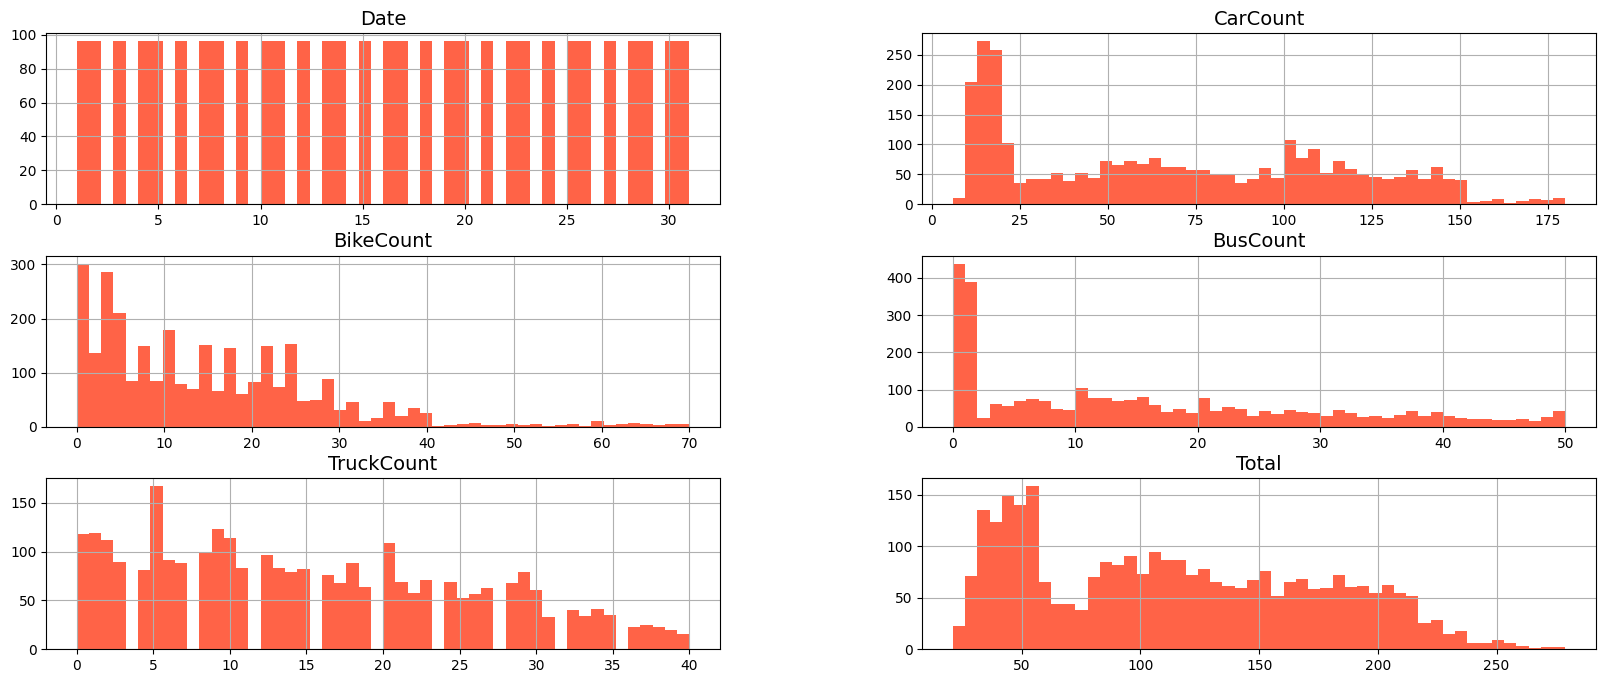

In [7]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
Traffic.hist(bins=50, figsize=(20, 8), color='tomato')
plt.show()

# Here we decided to use Imputer for Null values 

In [8]:
Traffic.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             3
BikeCount            3
BusCount             2
TruckCount           7
Total                0
Traffic Situation    0
dtype: int64

# A scatter matrix that shows the relations between all numerical features 

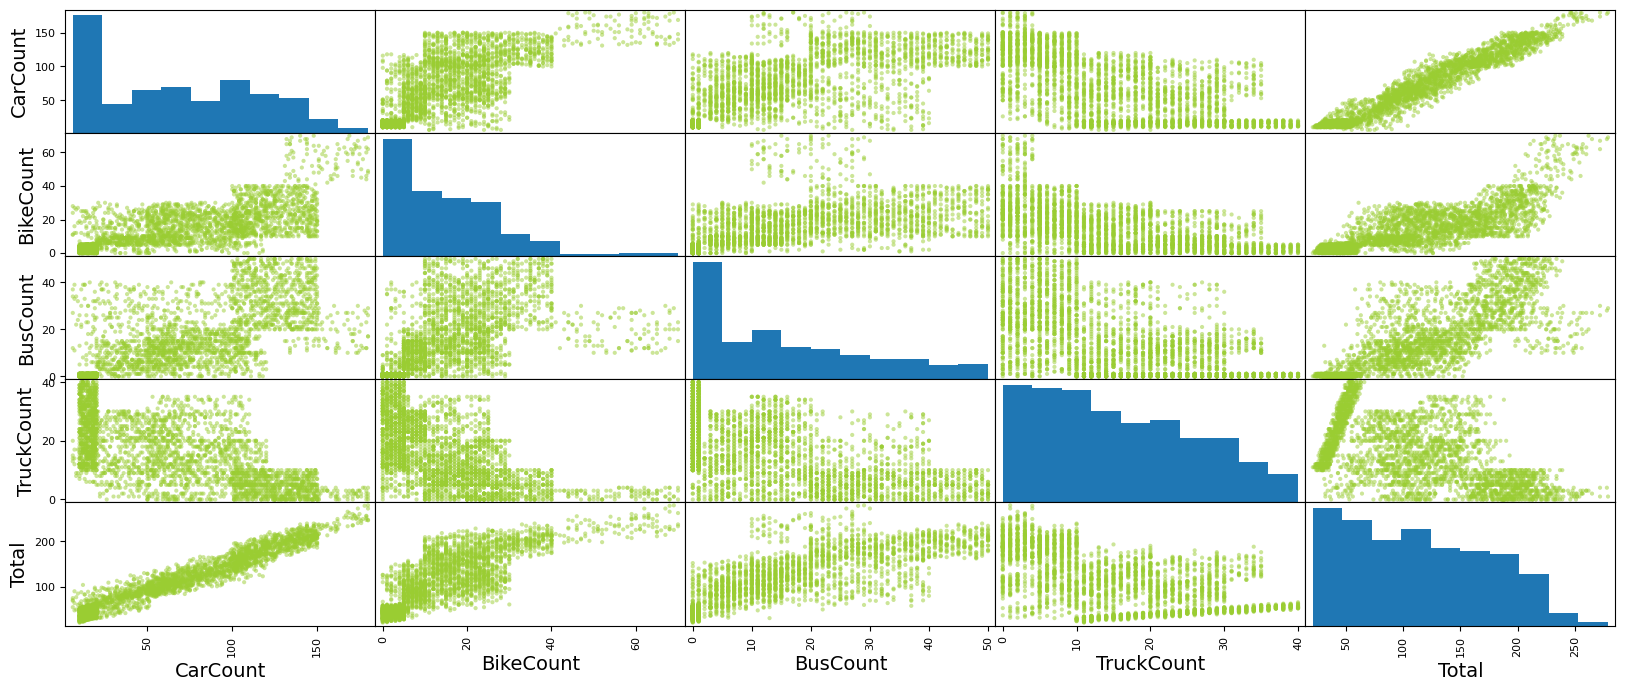

In [9]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["CarCount", "BikeCount", "BusCount","TruckCount","Total"]
scatter_matrix(Traffic[attributes], figsize=(20, 8),color='yellowgreen')
plt.show()

# Step 3
## Analyzing The Data

## The code below shows the relation between CarCount and TruckCount on Tuesday 
## We can see that Trucks and Cars are crowded between [0-20] for CarCount 

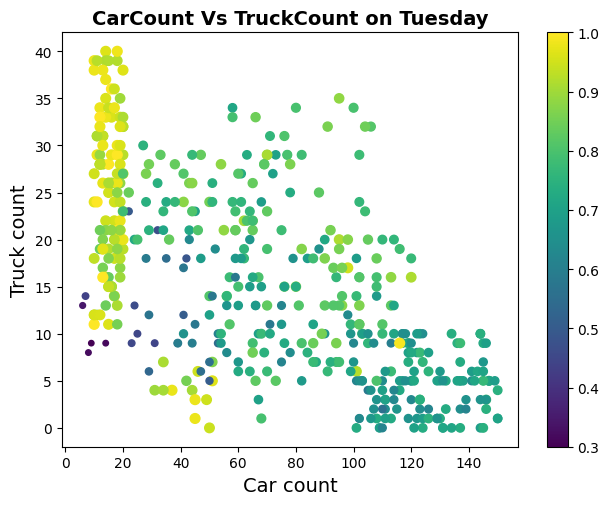

In [10]:

import matplotlib.cm as cm
a=Traffic[['Day of the week','CarCount','TruckCount','Total']][Traffic['Day of the week']=='Tuesday']
c=list(a['CarCount'])
t=list(a['TruckCount'])
colors=(a['CarCount']+a['TruckCount'])/a['Total']
size=colors*50
plt.scatter(c,t,c=colors,s=size)
plt.tight_layout()
plt.xlabel('Car count')
plt.ylabel('Truck count')
plt.title("CarCount Vs TruckCount on Tuesday",fontweight='bold')
plt.colorbar()
plt.show()

## The code below shows the probability of BusCount which is the highest in Tuesday and then it varies through the week 

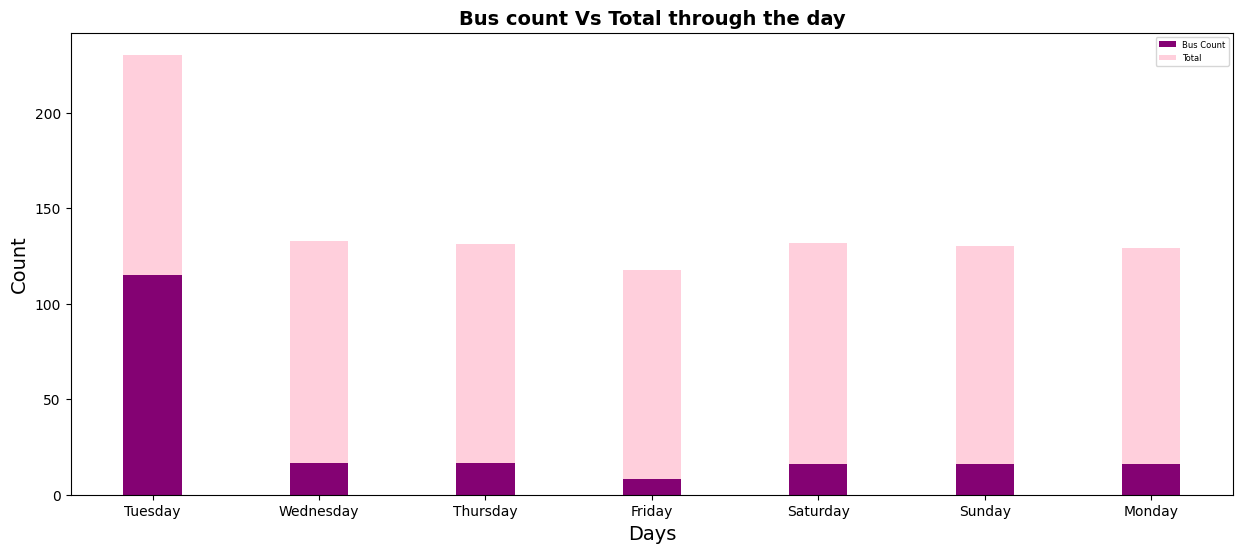

In [11]:
labels = ['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday','Monday'] 
x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Tuesday']
sumt=0
sumc=0
avt=0
avc=0
tuec=list(x['BusCount'])
tuet=list(x['Total'])
for i in range(0,len(tuec)):
    sumc+=tuet[i]
avc=sumc/len(tuec)
for i in range(0,len(tuet)):
    sumt+=tuet[i]
avt=sumt/len(tuet)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Wednesday']
sumwc=0
sumwt=0
avwc=0
avwt=0
wedc=list(x['BusCount'])
wedt=list(x['Total'])
for i in range(0,len(wedc)):
    sumwc+=wedc[i]
avwc=sumwc/len(wedc)
for i in range(0,len(wedt)):
    sumwt+=wedt[i]
avwt=sumwt/len(wedt)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Thursday']
sumtc=0
sumtt=0
avtc=0
avtt=0
thuc=list(x['BusCount'])
thut=list(x['Total'])
for i in range(0,len(thuc)):
    sumtc+=thuc[i]
avtc=sumtc/len(thuc)
for i in range(0,len(thut)):
    sumtt+=thut[i]
avtt=sumtt/len(thut)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Friday']
sumfc=0
sumft=0
avfc=0
avft=0
fric=list(x['BusCount'])
frit=list(x['Total'])
for i in range(0,len(fric)):
    sumfc+=fric[i]
avfc=sumfc/len(fric)
for i in range(0,len(frit)):
    sumft+=frit[i]
avft=sumft/len(frit)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Saturday']
sumsc=0
sumst=0
avsc=0
avst=0
satc=list(x['BusCount'])
satt=list(x['Total'])
for i in range(0,len(satc)):
    sumsc+=satc[i]
avsc=sumsc/len(satc)
for i in range(0,len(satt)):
    sumst+=satt[i]
avst=sumst/len(satt)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Sunday']
sumuc=0
sumut=0
avuc=0
avut=0
sunc=list(x['BusCount'])
sunt=list(x['Total'])
for i in range(0,len(sunc)):
    sumuc+=sunc[i]
avuc=sumuc/len(sunc)
for i in range(0,len(sunt)):
    sumut+=sunt[i]
avut=sumut/len(sunt)

x=Traffic[['Day of the week','BusCount','Total']][Traffic['Day of the week']=='Monday']
summc=0
summt=0
avmc=0
avmt=0
monc=list(x['BusCount'])
mont=list(x['Total'])
for i in range(0,len(monc)):
    summc+=monc[i]
avmc=summc/len(monc)
for i in range(0,len(mont)):
    summt+=mont[i]
avmt=summt/len(mont)
bus=[avc,avwc,avtc,avfc,avsc,avuc,avmc]
tot=[avt,avwt,avtt,avft,avst,avut,avmt]      
leg=["Bus Count", "Total"]   
fig = plt.figure(1, figsize=(15,6)) 
plt.bar(labels,bus,width=0.35,color='#840273') 
plt.bar(labels, tot,bottom=bus,width=0.35,color='#ffcfdc') 
plt.title('Bus count Vs Total through the day',fontweight='bold')
plt.xlabel("Days")
plt.legend(leg,loc="upper right",prop={'size':6})
plt.ylabel('Count')
plt.show()

## The code below shows the percentage of CarCount and BusCount with Traffic Situation 
## The BusCount is the highest in Heavy Traffic Situation , While CarCount is the highest in Normal Traffic Situation

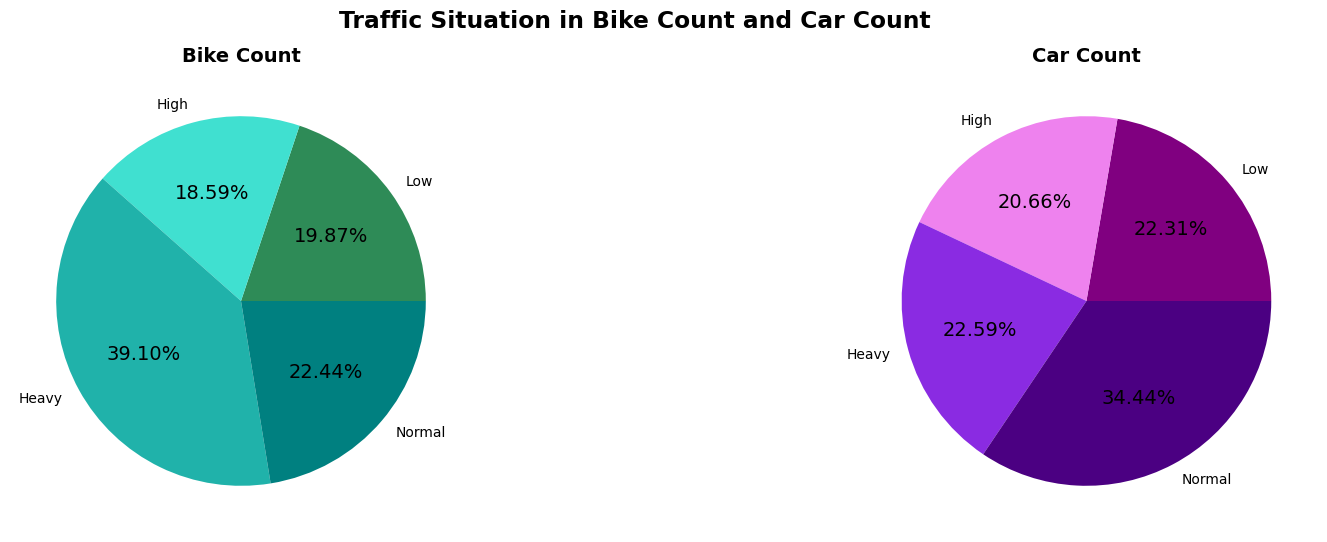

In [12]:
bikelow=len(Traffic[Traffic['Traffic Situation']=='low']['BikeCount'].value_counts())
bikehigh=len(Traffic[Traffic['Traffic Situation']=='high']['BikeCount'].value_counts())
bikeheavy=len(Traffic[Traffic['Traffic Situation']=='heavy']['BikeCount'].value_counts())
bikenormal=len(Traffic[Traffic['Traffic Situation']=='normal']['BikeCount'].value_counts())
bike_traffic=[bikelow,bikehigh,bikeheavy,bikenormal]

carlow=len(Traffic[Traffic['Traffic Situation']=='low']['CarCount'].value_counts())
carhigh=len(Traffic[Traffic['Traffic Situation']=='high']['CarCount'].value_counts())
carheavy=len(Traffic[Traffic['Traffic Situation']=='heavy']['CarCount'].value_counts())
carnormal=len(Traffic[Traffic['Traffic Situation']=='normal']['CarCount'].value_counts())
car_traffic=[carlow,carhigh,carheavy,carnormal]

lab=['Low','High','Heavy','Normal']

colorbike=['seagreen','turquoise','lightseagreen','teal']
colorcar =['purple','violet','blueviolet','indigo']
fig = plt.figure(1, figsize=(20,6))
plt.suptitle('Traffic Situation in Bike Count and Car Count ',fontweight='bold')
plt.subplot(121)
plt.pie(bike_traffic,labels=lab,autopct='%1.2f%%',colors=colorbike)
plt.title('Bike Count',fontweight='bold')
plt.subplot(122)
plt.pie(car_traffic,labels=lab,autopct='%1.2f%%',colors=colorcar)
plt.title('Car Count',fontweight='bold')

plt.show()


# Step 4
###  prepared the data for a trining Model

In [13]:
Traffic[['Num', 'Day_night']] = Traffic['Time'].str.split(' ',expand=True)
Traffic.drop('Time',axis=1,inplace=True)
Traffic.drop('Num',axis=1,inplace=True)
print(Traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2976 non-null   int64  
 1   Day of the week    2976 non-null   object 
 2   CarCount           2973 non-null   float64
 3   BikeCount          2973 non-null   float64
 4   BusCount           2974 non-null   float64
 5   TruckCount         2969 non-null   float64
 6   Total              2976 non-null   int64  
 7   Traffic Situation  2976 non-null   object 
 8   Day_night          2976 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 209.4+ KB
None


# We used SimpleImputer and StandardScaler for the numerical features
* standardscaler is used because of outliers

In [14]:
traffic_num = ['Date','CarCount','BikeCount','BusCount','TruckCount','Total']
num_pipline = Pipeline([('imputer',SimpleImputer(strategy='median')),('std_scaler',StandardScaler())])

# We used OrdinalEncoder for the categorical features  and  target  

In [15]:
traffic_cat = ['Day of the week','Day_night','Traffic Situation']
cat_pipline=Pipeline([('ordinal_encoder',OrdinalEncoder())])

# we merged both the numerical and categorical features into one full pipline 

In [16]:
full_pipline= ColumnTransformer([("num",num_pipline,traffic_num),("cat",cat_pipline,traffic_cat)],remainder="passthrough")


# Data is prepared in this step and converted to DataFrame 
* dealing with DataFrames is more flexable

In [17]:
Traffic_prepared=full_pipline.fit_transform(Traffic)
Final_Traffic=pd.DataFrame(Traffic_prepared,columns=full_pipline.get_feature_names_out())
print(Final_Traffic)

      num__Date  num__CarCount  num__BikeCount  num__BusCount  \
0     -0.670820      -0.821900       -1.161136      -0.786409   
1     -0.670820      -0.429011       -1.161136      -0.856210   
2     -0.670820      -0.494492       -1.161136      -0.856210   
3     -0.670820      -0.385356       -1.161136      -0.926010   
4     -0.670820      -0.254393       -0.693729      -0.018599   
...         ...            ...             ...            ...   
2971  -0.782624      -1.149307       -0.927433      -0.995811   
2972  -0.782624      -1.258443       -1.161136      -0.995811   
2973  -0.782624      -1.171134       -0.849532      -0.995811   
2974  -0.782624      -1.149307       -0.771630      -1.065612   
2975  -0.782624      -1.192961       -0.927433      -0.995811   

      num__TruckCount  num__Total  cat__Day of the week  cat__Day_night  \
0           -1.067914   -1.249880                   5.0             0.0   
1           -1.162349   -0.984013                   5.0             0

# These subplots represent the data after applying pipline 
*clearly categorical features can be represented now  

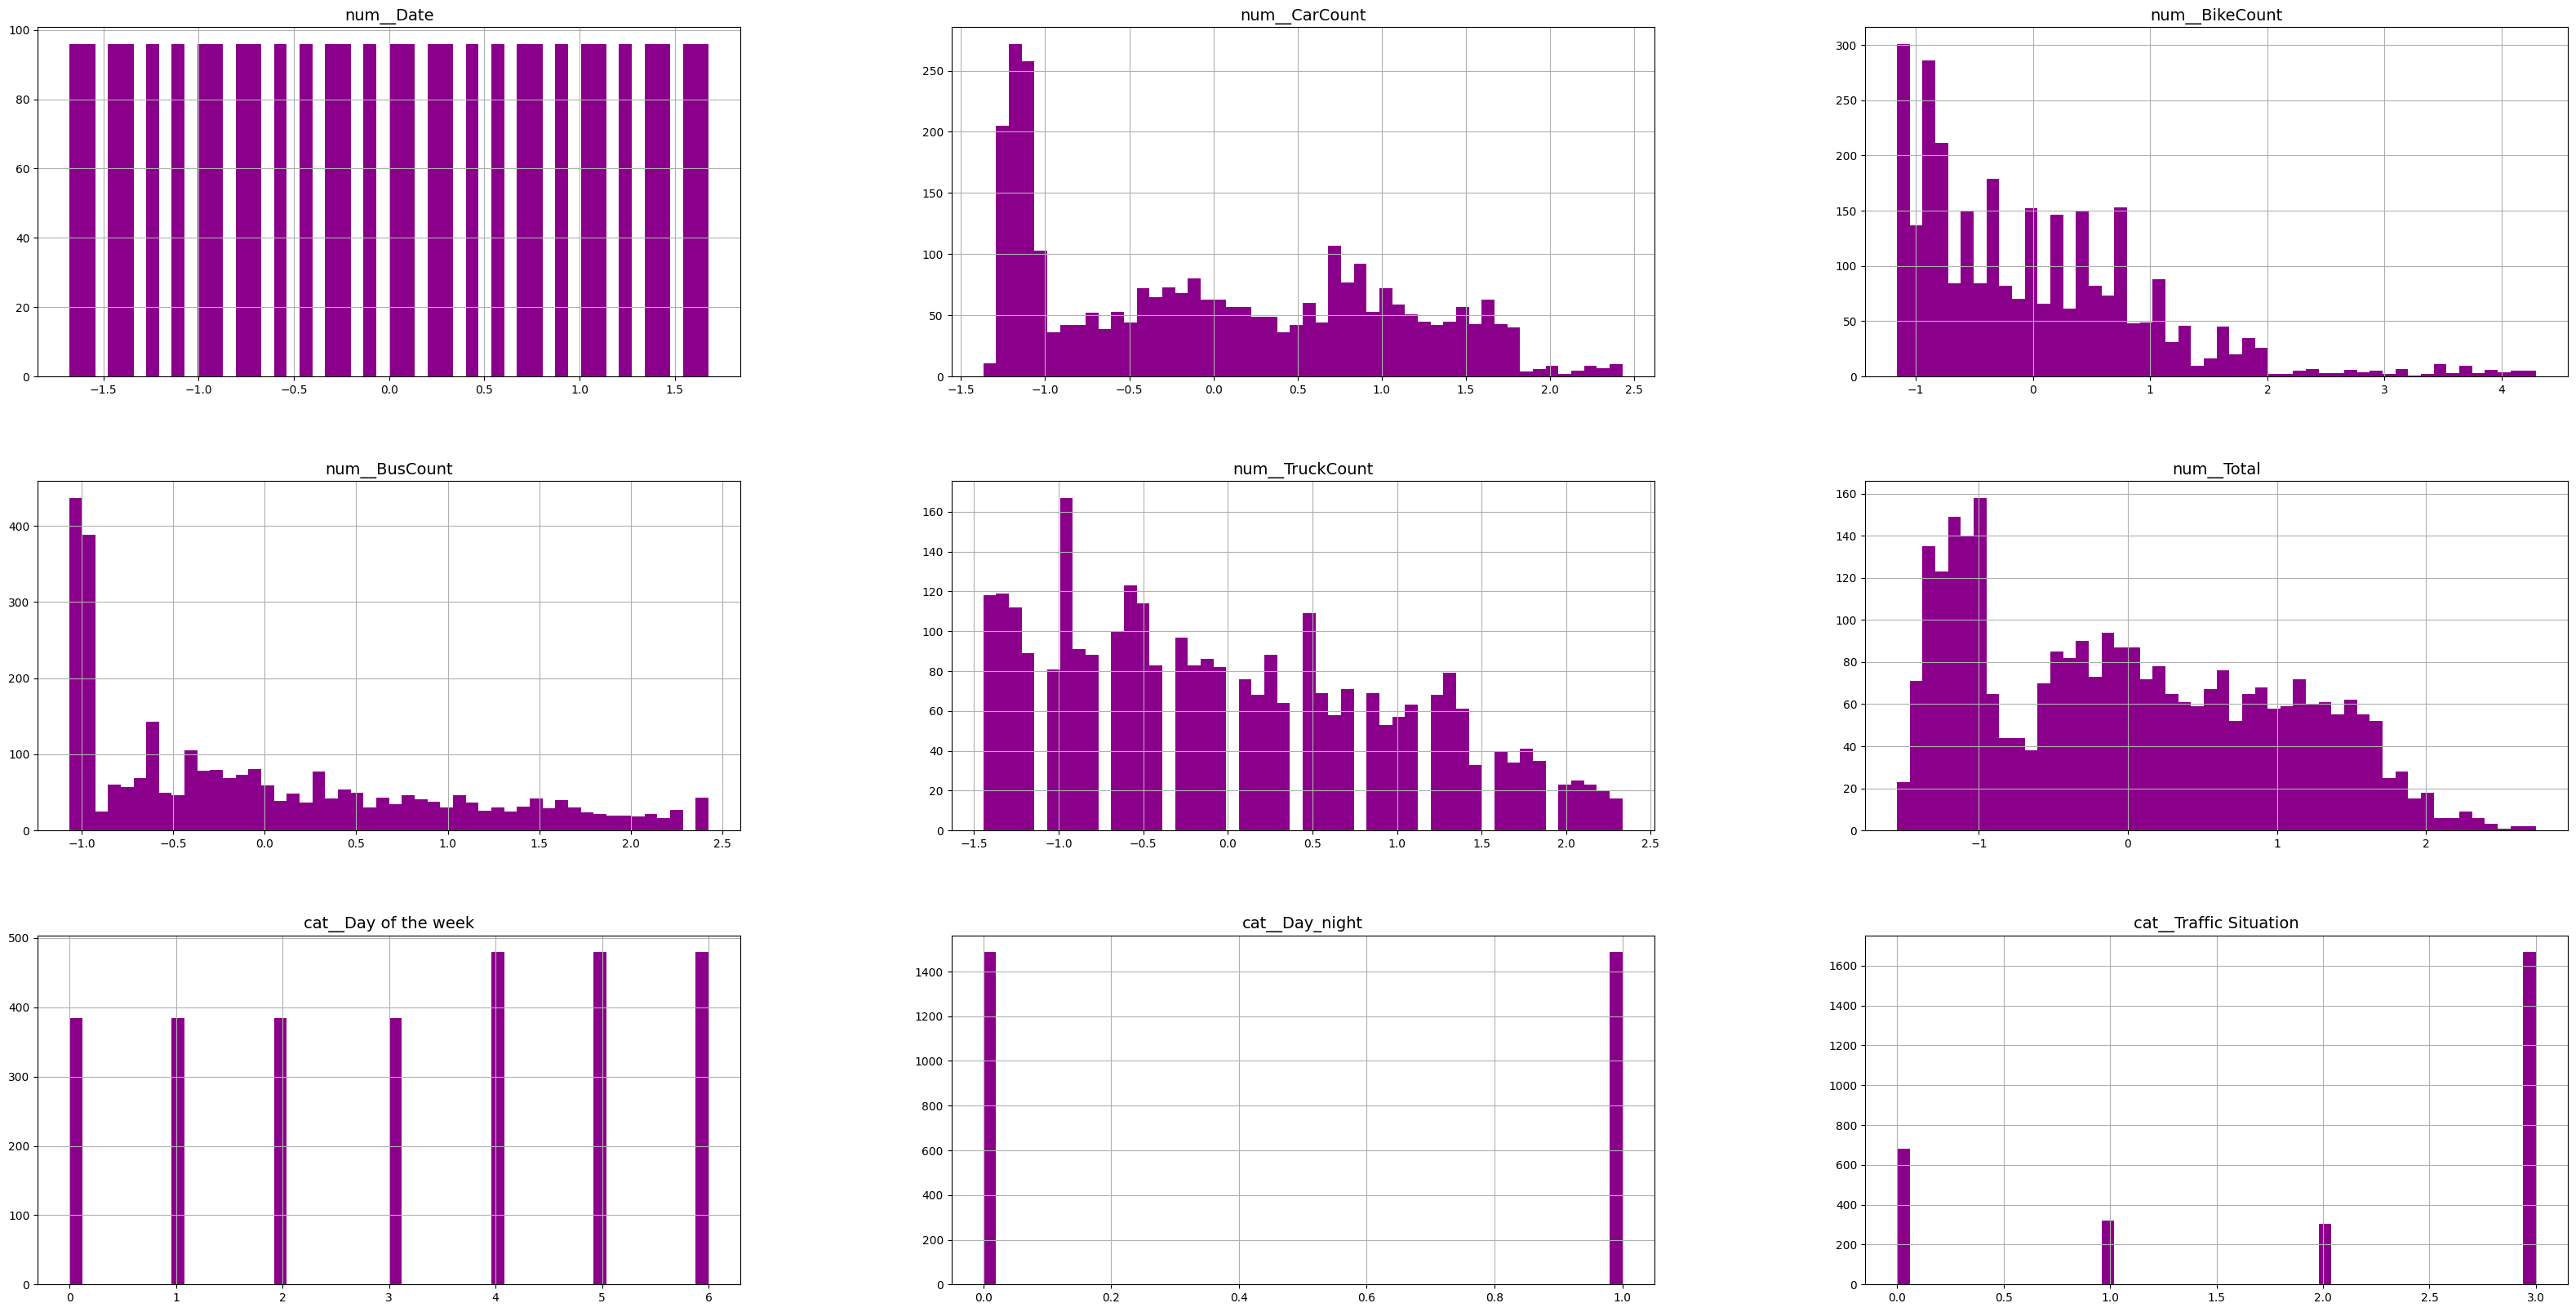

In [18]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
Final_Traffic.hist(bins=50, figsize=(40,20),color='darkmagenta')
plt.show()

# Looking for correlations between the label and the other features

In [19]:
corr_matrix=Final_Traffic.corr()
print(corr_matrix['cat__Traffic Situation'].sort_values(ascending=False))

cat__Traffic Situation    1.000000
num__TruckCount           0.494015
num__Date                 0.008981
cat__Day of the week      0.008125
cat__Day_night           -0.079529
num__BikeCount           -0.614706
num__BusCount            -0.703915
num__CarCount            -0.747024
num__Total               -0.781925
Name: cat__Traffic Situation, dtype: float64


### Clearly , you can see that correlation equals 1 with the feature itself and it is close to 1 when it's proportional with Traffic Situation.
### While it's close to 0 they are independet , and when it's negative it will be inversely proportional with Traffic Situation.

# Here we split the data into a train set and a test set using StratifiedShuffleSplit 

In [20]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(Final_Traffic, Final_Traffic["cat__Traffic Situation"]):
    Traffic_train_set_n = Final_Traffic.iloc[train_index]
    Traffic_test_set_n = Final_Traffic.iloc[test_index]
    strat_splits.append([Traffic_train_set_n, Traffic_test_set_n])
Traffic_train, Traffic_test = strat_splits[0]
print(Traffic_test.shape)
print(Traffic_train.shape)
Traffic_train_label=Traffic_train["cat__Traffic Situation"].copy()
Traffic_train=Traffic_train.drop("cat__Traffic Situation",axis=1)
Traffic_test_label=Traffic_test["cat__Traffic Situation"].copy()
Traffic_test=Traffic_test.drop("cat__Traffic Situation",axis=1)

(596, 9)
(2380, 9)


* as you see the size of test data is smaller than train data as expected and include all samples of target because of using stratified shuffled split 

# Now the data is ready for training a multiclass classifier

In [21]:
Traffic_test_low     =(Traffic_test_label   == 2)
Traffic_train_low    =(Traffic_train_label  == 2)
Traffic_test_high    =(Traffic_test_label   == 1)
Traffic_train_high   =(Traffic_train_label  == 1)
Traffic_test_normal  =(Traffic_test_label   == 3)
Traffic_train_normal =(Traffic_train_label  == 3)
Traffic_test_heavy   =(Traffic_test_label   == 0)
Traffic_train_heavy  =(Traffic_train_label  == 0)

* 0 belongs to Heavy Class
* 1 belongs to High Class
* 2 belongs to Low Class
* 3 belongs to Normal Class

## This figure compares all the classes in the testdata.
## We can see that the Normal class has the highest probability and then the Heavy class and then the High class and lastly the Low class.

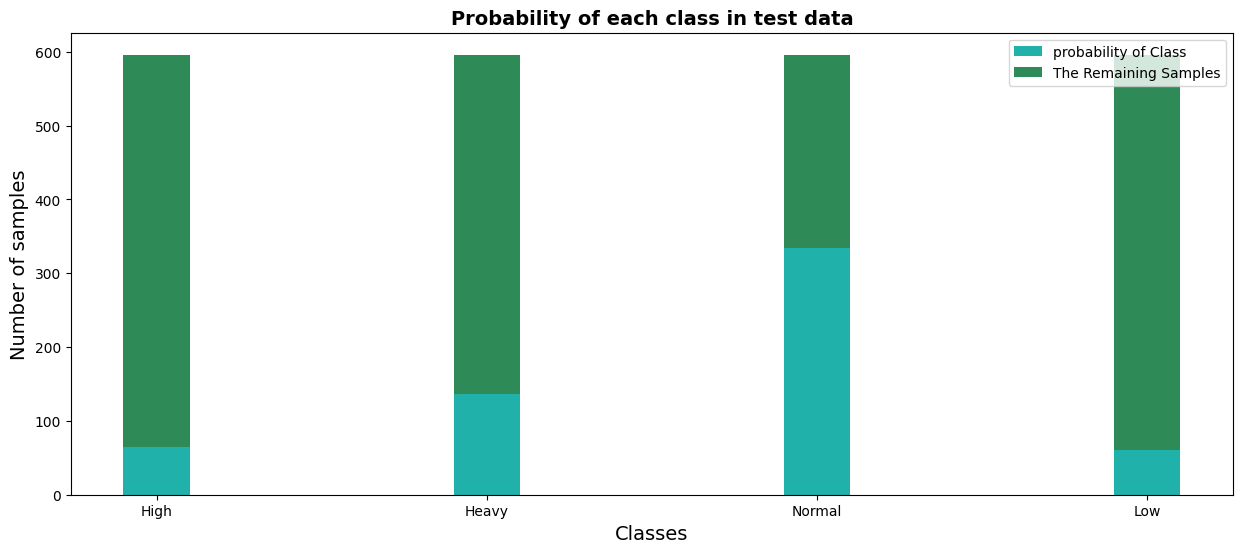

In [22]:
high_num=Traffic_test_high.value_counts().iloc[1]
heavy_num=Traffic_test_heavy.value_counts().iloc[1]
normal_num=Traffic_test_normal.value_counts().iloc[0]
low_num=Traffic_test_low .value_counts().iloc[1]
test_num=len(Traffic_test_label)
ylabel=[high_num,heavy_num,normal_num,low_num]
xlabels=['High','Heavy','Normal','Low']
ylabel2=[test_num-high_num,test_num-heavy_num,test_num-normal_num,test_num-low_num]
fig = plt.figure(1, figsize=(15,6)) 
leg=['probability of Class','The Remaining Samples']
plt.bar(xlabels,ylabel,width=0.2,color='lightseagreen')
plt.bar(xlabels, ylabel2,bottom=ylabel,width=0.2,color='seagreen') 
plt.title('Probability of each class in test data',fontweight='bold')
plt.xlabel("Classes")
plt.legend(leg,loc="upper right",prop={'size':10})
plt.ylabel('Number of samples')
plt.show()


## Now we will train the data with 6 classifiers:
* Support vector machine 
* Logistic Regression
* K-neighbors 
* Random Forest 
* Gaussian Process 
* Decision tree 
 

## The code below shows how the support vector machine works . basically , it gives large margin classification and it divides the classes as much as possible . It is used with complex but small or medium sized datasets .
## Also we used GridSearch in this classifier it takes the classifier , parameters , 3 rounds cross validation and accuracy as scoring techniqe. 

In [23]:
svm_clf = SVC(random_state=42)
param_grid = [{
'gamma': ['auto', 'scale'],
'C':[0.001,0.1,10],
'kernel':['linear','rbf']
}]
grid_searchs = GridSearchCV(svm_clf, param_grid, cv=3,scoring='accuracy')
grid_searchs.fit(Traffic_train, Traffic_train_label)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.001, 0.1, 10], 'gamma': ['auto', 'scale'],
                          'kernel': ['linear', 'rbf']}],
             scoring='accuracy')

## The parameters are:
* gamma which takes 2 values (auto , scale) and this parameter controls the degree of the curve that divides the classes .
* C which takes 3 values (0.001,0.1,10) and this parameter controls the hardness of the split between classes .
* kernel which takes 2 values ('linear','rbf') and this parameter choose whether it's linear or non-linear classification.
* random state which takes 1 value (42) and is used to keep the output the same in each iteration (without it the output will change each time the code will be run)

## The best parameters are when :
* C=10,gamma = auto , kernel = rbf 

In [24]:
grid_searchs.best_estimator_

SVC(C=10, gamma='auto', random_state=42)

In [25]:
grid_searchs.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

## The accuracy is 0.936972120665394 when using Support Vector Machine.

In [26]:
print("The accuracy for SVC = "+str(grid_searchs.best_score_))

The accuracy for SVC = 0.936972120665394


## The code below shows the confusion matrix for both the train and test data ,respectively.
* True Positive => represents the diagonal of these matrices (When I predict the values right).
* False Positive => represents the remainig values. 


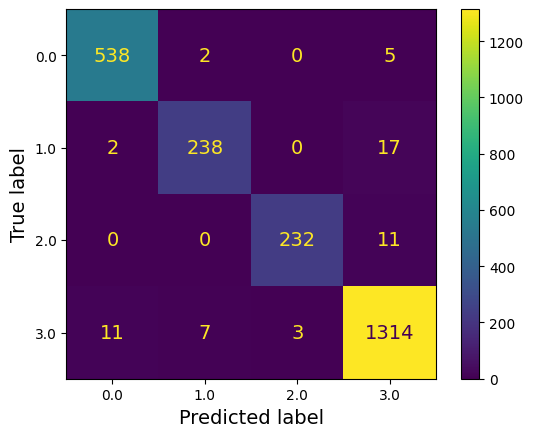

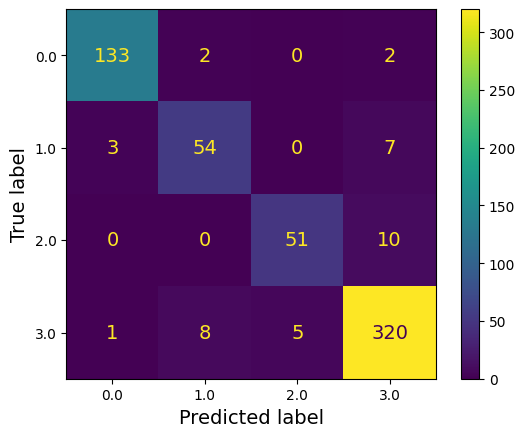

In [27]:
svcp1=grid_searchs.predict(Traffic_train)
svcp2=grid_searchs.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,svcp1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,svcp2)
plt.show()


## precision :How many times I predict the TP right on point .
## This code shows the precision as an array for each class (class 0 - class 3) 

In [28]:
precision_score(Traffic_test_label,svcp2,average=None)

array([0.97080292, 0.84375   , 0.91071429, 0.9439528 ])

## recall : the number of prediction .
## This code shows the recall as an array for each class (class 0 - class 3) 

In [29]:
recall_score(Traffic_test_label,svcp2,average=None)

array([0.97080292, 0.84375   , 0.83606557, 0.95808383])

## the ratio between the precision and the recall
## This code shows the f1-score as an array for each class (class 0 - class 3) 

In [30]:
f1_score(Traffic_test_label,svcp2,average=None)

array([0.97080292, 0.84375   , 0.87179487, 0.95096582])

## The code below shows the second classifier which is Logistic Regression . It works as Linear regression but it gives the probability of each class and then I choose the highest probablitiy .
## Also we used Randomized search that takes the classifier , the parameters , accuracy as scoring technique and error score .
* error score : Value to assign to the score if an error occurs in estimator fitting. If set to ‘raise’, the error is raised. If a numeric value is given, FitFailedWarning is raised. This parameter does not affect the refit step, which will always raise the error

In [31]:
log_reg = LogisticRegression(max_iter=1000)
log_params = [
{'C': [10,50,100],
'n_jobs': [-1,5,16]
}]
rand_search = RandomizedSearchCV(log_reg,log_params, cv=3,scoring='accuracy', random_state=42,error_score='raise')
rand_search.fit(Traffic_train, Traffic_train_label)

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=LogisticRegression(max_iter=1000),
                   param_distributions=[{'C': [10, 50, 100],
                                         'n_jobs': [-1, 5, 16]}],
                   random_state=42, scoring='accuracy')

## This classifier takes 2 parameters : 
* C
* n_jobs : number of used resources (when it's -1 it will use all the avaliable resources).
* max_iter : number of maximum iterations.

## Best parameters are :
* C =50 , max_iter=1000, n_jobs=-1.

In [32]:
rand_search.best_estimator_

LogisticRegression(C=50, max_iter=1000, n_jobs=-1)

In [33]:
rand_search.best_params_

{'n_jobs': -1, 'C': 50}

## The best score is 0.8987382247901717 when using this classifier.

In [34]:
rand_search.best_score_

0.8987382247901717

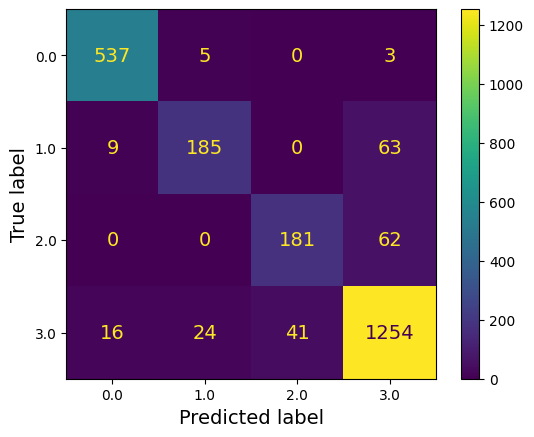

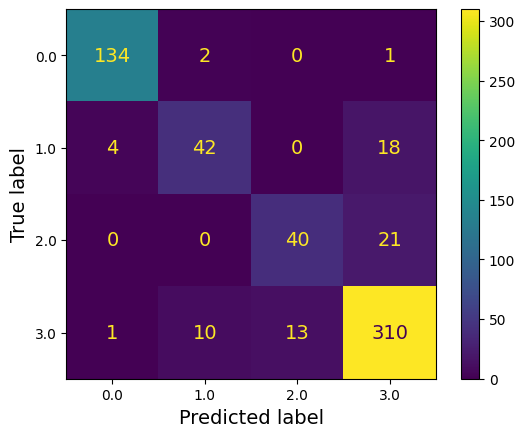

In [35]:
P1=rand_search.predict(Traffic_train)
P2=rand_search.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,P1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,P2)
plt.show()

In [36]:
precision_score(Traffic_test_label,P2,average=None)

array([0.96402878, 0.77777778, 0.75471698, 0.88571429])

In [37]:
recall_score(Traffic_test_label,P2,average=None)

array([0.97810219, 0.65625   , 0.6557377 , 0.92814371])

In [38]:
f1_score(Traffic_test_label,P2,average=None)

array([0.97101449, 0.71186441, 0.70175439, 0.90643275])

## The code below shows the third classifier whic is K-neighors classifier . It chooses the closests K to it and then chooses the majority class .

In [39]:
knn_clf = KNeighborsClassifier()
knn_params = [{
'n_neighbors':[3,5,7],
'weights':['uniform','distance'],
'algorithm':['auto', 'ball_tree', 'kd_tree'],
'leaf_size':[20,30,40]
}]
randknn_search = RandomizedSearchCV(knn_clf,knn_params, cv=3,scoring='accuracy', random_state=42,error_score='raise')
randknn_search.fit(Traffic_train,Traffic_train_label)

RandomizedSearchCV(cv=3, error_score='raise', estimator=KNeighborsClassifier(),
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree'],
                                         'leaf_size': [20, 30, 40],
                                         'n_neighbors': [3, 5, 7],
                                         'weights': ['uniform', 'distance']}],
                   random_state=42, scoring='accuracy')

## The parameters are :
* n_neighbors : number of neighbors for the predicted sample (preferred to be odd number).
* weights : weight fuction used in perdict.
* algorithm : Algorithm used to compute the nearest neighbors
* leaf_size : the maximum number of samples in the leaf node .

## The best parameters are :
* weights= distance, n_neighbors= 7, leaf_size= 20, algorithm=auto

In [40]:
randknn_search.best_estimator_

KNeighborsClassifier(leaf_size=20, n_neighbors=7, weights='distance')

In [41]:
randknn_search.best_params_

{'weights': 'distance', 'n_neighbors': 7, 'leaf_size': 20, 'algorithm': 'auto'}

## The best score is 0.882356958398582 when we used this classifier .

In [42]:
randknn_search.best_score_

0.882356958398582

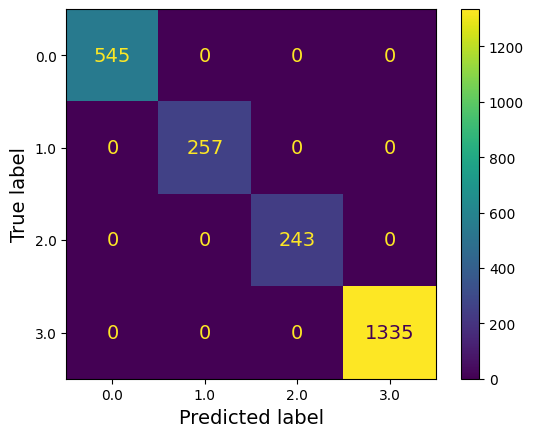

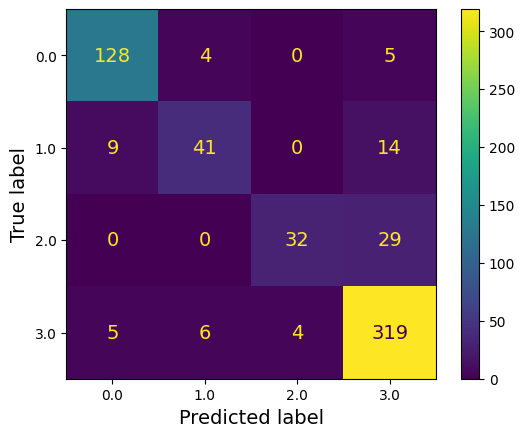

In [43]:
knn1=randknn_search.predict(Traffic_train)
knn2=randknn_search.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,knn1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,knn2)
plt.show()

In [44]:
precision_score(Traffic_test_label,P2,average=None)

array([0.96402878, 0.77777778, 0.75471698, 0.88571429])

In [45]:
recall_score(Traffic_test_label,P2,average=None)

array([0.97810219, 0.65625   , 0.6557377 , 0.92814371])

In [46]:
f1_score(Traffic_test_label,P2,average=None)

array([0.97101449, 0.71186441, 0.70175439, 0.90643275])

## This code shows the Random Forest Classifier , which fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [47]:
forest_clf = RandomForestClassifier()
param_grid = [{
'n_estimators':[500,1000],
'min_samples_split':[2,3],
'max_depth' :[2,4],
'random_state':[42]
}]
grid_searchf = GridSearchCV(forest_clf, param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_searchf.fit(Traffic_train, Traffic_train_label)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4], 'min_samples_split': [2, 3],
                          'n_estimators': [500, 1000], 'random_state': [42]}],
             scoring='accuracy')

## The parameters are :
* n_estimators : number of trees in the forest
* min_samples_split : minimum number of samples required to split an internal node . 
* max_depth : maximum level of splits .
*  random_state.

The best parameters are :
* max_depth= 4,min_samples_split= 2,n_estimators= 500,random_state = 42

In [48]:
grid_searchf.best_params_

{'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 500,
 'random_state': 42}

In [49]:
grid_searchf.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=500, random_state=42)

## The best score is 0.9222621743784564 when we used this classifier.

In [50]:
grid_searchf.best_score_

0.9222621743784564

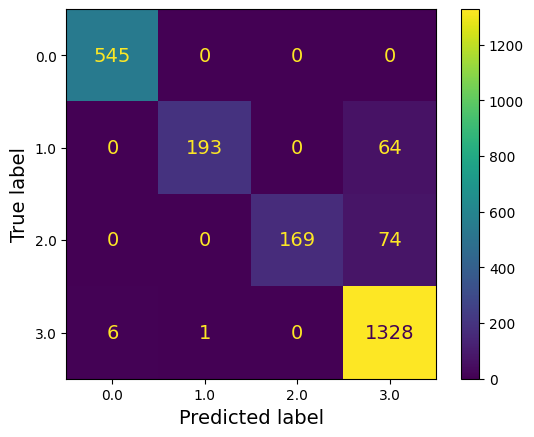

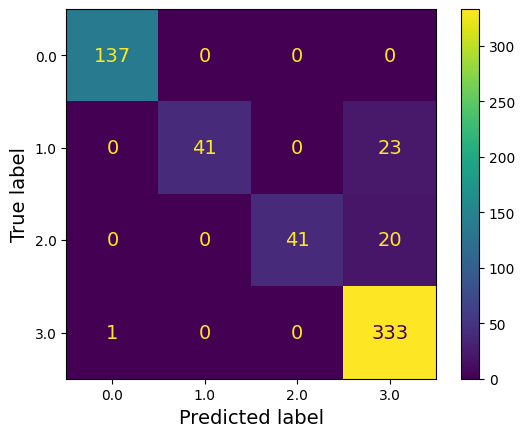

In [51]:
randp1=grid_searchf.predict(Traffic_train)
randp2=grid_searchf.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,randp1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,randp2)
plt.show()

In [52]:
recall_score(Traffic_test_label,randp2,average=None)

array([1.        , 0.640625  , 0.67213115, 0.99700599])

In [53]:
precision_score(Traffic_test_label,randp2,average=None)

array([0.99275362, 1.        , 1.        , 0.8856383 ])

In [54]:
f1_score(Traffic_test_label,randp2,average=None)

array([0.99636364, 0.78095238, 0.80392157, 0.93802817])

## This classifier below is The Gaussian Process Classifier. it is a generalization of the Gaussian probability distribution and can be used as the basis for sophisticated non-parametric machine learning algorithms for classification and regression

In [55]:
gpc = GaussianProcessClassifier()
param_grid = [{
'max_iter_predict':[300,250],
'multi_class':['one_vs_rest', 'one_vs_one'],
'random_state': [100,1000],
'n_jobs' :[-1]
}]
grid_searchg = GridSearchCV(gpc, param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_searchg.fit(Traffic_train, Traffic_train_label)

GridSearchCV(cv=3, error_score='raise', estimator=GaussianProcessClassifier(),
             param_grid=[{'max_iter_predict': [300, 250],
                          'multi_class': ['one_vs_rest', 'one_vs_one'],
                          'n_jobs': [-1], 'random_state': [100, 1000]}],
             scoring='accuracy')

## The parameters are :
* max_iter_predict : The maximum number of iterations.Smaller values will reduce computation time at the cost of worse results.
* multi_class : Has two methods which specifies how muliclass classification problems are handled.
* random_state
* n_jobs

## The best parameters are :
* max_iter_predict=300,multi_class= one_vs_one,n_jobs= -1,random_state= 100

In [56]:
grid_searchg.best_params_

{'max_iter_predict': 300,
 'multi_class': 'one_vs_one',
 'n_jobs': -1,
 'random_state': 100}

In [57]:
grid_searchg.best_estimator_

GaussianProcessClassifier(max_iter_predict=300, multi_class='one_vs_one',
                          n_jobs=-1, random_state=100)

## The best score is 0.9016806375686501 when we used thsi classifier

In [58]:
grid_searchg.best_score_

0.9016806375686501

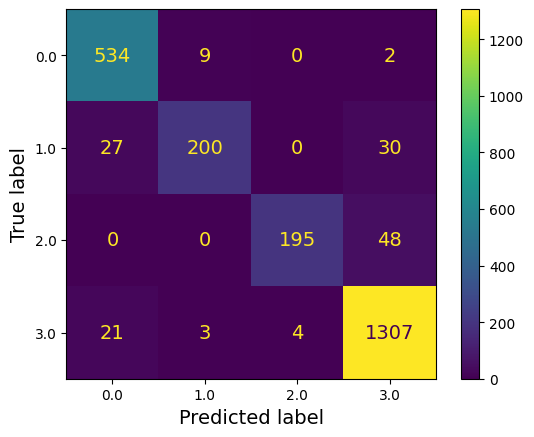

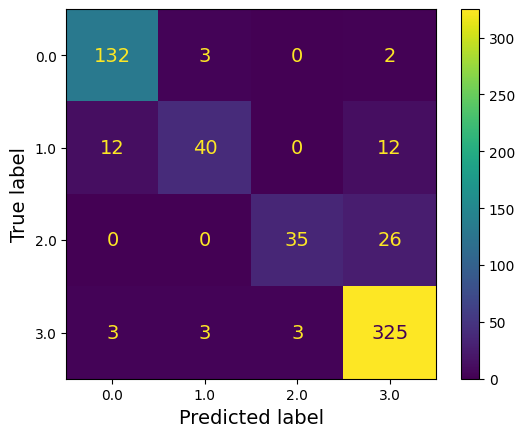

In [59]:
gpcp1=grid_searchg.predict(Traffic_train)
gpcp2=grid_searchg.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,gpcp1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,gpcp2)
plt.show()

In [60]:
precision_score(Traffic_test_label,gpcp2,average=None)

array([0.89795918, 0.86956522, 0.92105263, 0.89041096])

In [61]:
recall_score(Traffic_test_label,gpcp2,average=None)

array([0.96350365, 0.625     , 0.57377049, 0.97305389])

In [62]:
f1_score(Traffic_test_label,gpcp2,average=None)

array([0.92957746, 0.72727273, 0.70707071, 0.92989986])

## This code shows the  final classifier which is The Decision Tree Classifier . In case that there are multiple classes with the same and highest probability, the classifier will predict the class with the lowest index amongst those classes.
 

In [63]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_params = [
{'criterion': ['gini', 'entropy', 'log_loss'],
'splitter': ['random'],
'min_samples_split':[5,7,6],
'max_depth': [2,4,6]}]
RandomizedSearch = RandomizedSearchCV(tree_clf,tree_params, cv=3,scoring='accuracy')
RandomizedSearch.fit(Traffic_train, Traffic_train_label)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   param_distributions=[{'criterion': ['gini', 'entropy',
                                                       'log_loss'],
                                         'max_depth': [2, 4, 6],
                                         'min_samples_split': [5, 7, 6],
                                         'splitter': ['random']}],
                   scoring='accuracy')

## The parameters are:
* criterion : The function to measure the quality of a split.
* splitter :The strategy used to choose the split at each node. 
* min_samples_split.
* max_depth .

In [64]:
RandomizedSearch.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_split=7, random_state=42,
                       splitter='random')

In [65]:
RandomizedSearch.best_params_

{'splitter': 'random',
 'min_samples_split': 7,
 'max_depth': 6,
 'criterion': 'gini'}

## The best score is 0.8495642497376816 when we used this classifier

In [66]:
RandomizedSearch.best_score_

0.8495642497376816

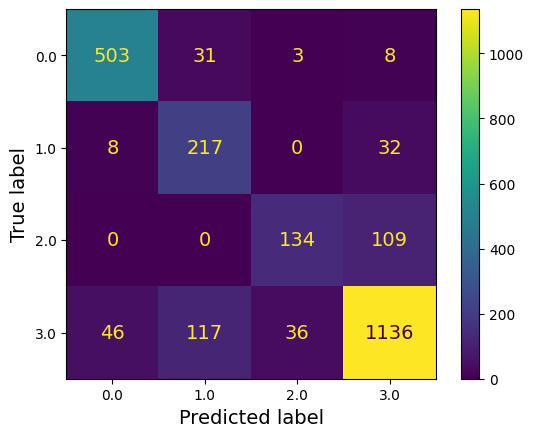

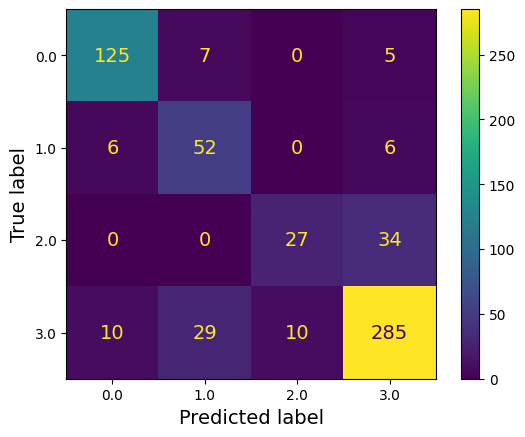

In [67]:
rasp1=RandomizedSearch.predict(Traffic_train)
rasp2=RandomizedSearch.predict(Traffic_test)
ConfusionMatrixDisplay.from_predictions(Traffic_train_label,rasp1)
ConfusionMatrixDisplay.from_predictions(Traffic_test_label,rasp2)
plt.show()

In [68]:
precision_score(Traffic_test_label,rasp2,average=None)

array([0.88652482, 0.59090909, 0.72972973, 0.86363636])

In [69]:
recall_score(Traffic_test_label,rasp2,average=None)

array([0.91240876, 0.8125    , 0.44262295, 0.85329341])

In [70]:
f1_score(Traffic_test_label,rasp2,average=None)

array([0.89928058, 0.68421053, 0.55102041, 0.85843373])

## **The code below shows the SGD Classifier that is used to find the tradeoff between the Precision and Recall**

In [71]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(Traffic_train, Traffic_train_label)

SGDClassifier(random_state=42)

In [72]:
predict=sgd_clf.predict(Traffic_test)


In [73]:
precision_score(Traffic_test_label,predict,average=None)

array([0.90604027, 0.68421053, 0.63333333, 0.89090909])

In [74]:
recall_score(Traffic_test_label,predict,average=None)

array([0.98540146, 0.609375  , 0.62295082, 0.88023952])

In [75]:
f1_score(Traffic_test_label,predict,average=None)

array([0.94405594, 0.6446281 , 0.62809917, 0.88554217])

## We used cross_val_predict to predict values and it returns boolean values of each sample and we used decision fuction to represent these values as numerical values.
## The code below shows the Tradeoff between precision and recall for the "low" class and the threshold for this class .
* We represent the range of 50 samples [200-250] to print the values of precision , recall, threshold.

In [76]:
testlow_scores = cross_val_predict(sgd_clf, Traffic_test, Traffic_test_low, cv=3,method="decision_function")
precisionsL, recallsL, thresholdsL = precision_recall_curve(Traffic_test_low, testlow_scores)
print("Precisions : ",precisionsL[200:250],"\n\n","Recalls : ", recallsL[200:250],"\n\n", "Thresholds : ",thresholdsL[200:250])

Precisions :  [0.1540404  0.15443038 0.15482234 0.15521628 0.15561224 0.15601023
 0.15641026 0.15681234 0.15721649 0.15762274 0.15803109 0.15844156
 0.15885417 0.15926893 0.15968586 0.16010499 0.16052632 0.16094987
 0.16137566 0.16180371 0.16223404 0.16266667 0.1631016  0.16353887
 0.16397849 0.16442049 0.16486486 0.16531165 0.16576087 0.16621253
 0.16666667 0.16712329 0.16758242 0.16804408 0.16850829 0.16897507
 0.16944444 0.16991643 0.17039106 0.17086835 0.17134831 0.17183099
 0.17231638 0.17280453 0.17329545 0.17378917 0.17428571 0.1747851
 0.17528736 0.17579251] 

 Recalls :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 

 Thresholds :  [-47.96195572 -47.8835292  -47.73985123 -47.72353579 -47.4181049
 -47.37300531 -47.28993125 -47.02382323 -47.0073666  -46.96817092
 -46.96605156 -46.75806348 -46.53662211 -46.49123669 -46.35703202
 -46.29985206 -46.29613845 -46.18363887 -46.0

## We decided to take the value 0 for the threshold because the precision starts to be higher than recall at this point 

In [77]:
thresholdL =0
label_scores_predL = (testlow_scores > thresholdL)
label_scores_predL=pd.DataFrame(label_scores_predL)

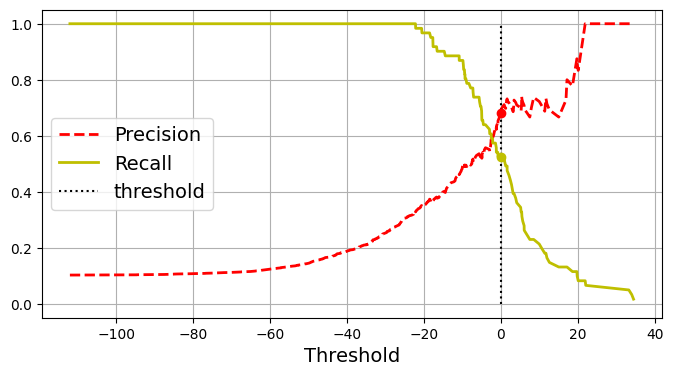

In [78]:
plt.figure(figsize=(8, 4))
plt.plot(thresholdsL, precisionsL[:-1], "r--", label="Precision", linewidth=2)
plt.plot(thresholdsL, recallsL[:-1], "y-", label="Recall", linewidth=2)
plt.vlines(thresholdL, 0, 1.0, "k", "dotted", label="threshold")
idxL = (thresholdsL >= thresholdL).argmax()
plt.plot(thresholdsL[idxL], precisionsL[idxL], "ro")
plt.plot(thresholdsL[idxL], recallsL[idxL], "yo")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()


## We chose to return the threshold for the first value of the precision when it's greater than or equal 0.67 because it's close to the threshold above .

In [79]:
idx_for_67_precision = (precisionsL >=0.67).argmax()
threshold_for_67_precision = thresholdsL[idx_for_67_precision]
threshold_for_67_precision

0.05317865292195023

## The code below shows the Tradeoff between precision and recall for the "normal" class and the threshold for this class .
* We represent the range of 50 samples [200-250] to print the values of precision , recall, threshold.

In [80]:
testnor_scores = cross_val_predict(sgd_clf, Traffic_test, Traffic_test_normal, cv=3,method="decision_function")
precisionsn, recallsn, thresholdsn = precision_recall_curve(Traffic_test_normal, testnor_scores)
print("Precisions : ",precisionsn[200:250],"\n\n","Recalls : ", recallsn[200:250],"\n\n", "Thresholds : ",thresholdsn[200:250])

Precisions :  [0.72474747 0.72658228 0.72588832 0.72519084 0.7244898  0.72634271
 0.72564103 0.72493573 0.72680412 0.72609819 0.72797927 0.72727273
 0.7265625  0.72584856 0.72513089 0.72440945 0.72631579 0.72559367
 0.72486772 0.72679045 0.72606383 0.728      0.72994652 0.72922252
 0.7311828  0.73045822 0.72972973 0.72899729 0.73097826 0.73297003
 0.73497268 0.73424658 0.73351648 0.73278237 0.7320442  0.73130194
 0.73333333 0.73537604 0.73463687 0.73389356 0.73314607 0.73239437
 0.73446328 0.73654391 0.73863636 0.73789174 0.74       0.73925501
 0.74137931 0.74351585] 

 Recalls :  [0.85928144 0.85928144 0.85628743 0.85329341 0.8502994  0.8502994
 0.84730539 0.84431138 0.84431138 0.84131737 0.84131737 0.83832335
 0.83532934 0.83233533 0.82934132 0.82634731 0.82634731 0.82335329
 0.82035928 0.82035928 0.81736527 0.81736527 0.81736527 0.81437126
 0.81437126 0.81137725 0.80838323 0.80538922 0.80538922 0.80538922
 0.80538922 0.80239521 0.7994012  0.79640719 0.79341317 0.79041916
 0.79041916

## We decided to take the value 2 for the threshold because the precision starts to be higher than recall at this point 

In [81]:
thresholdn =2
label_scores_predn = (testnor_scores > thresholdn)
label_scores_predn=pd.DataFrame(label_scores_predn)

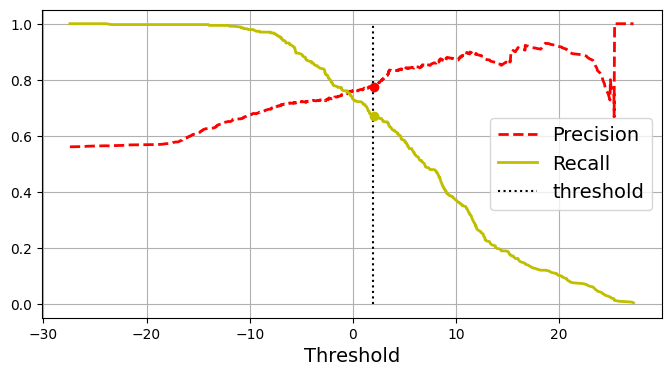

In [82]:
plt.figure(figsize=(8, 4))
plt.plot(thresholdsn, precisionsn[:-1], "r--", label="Precision", linewidth=2)
plt.plot(thresholdsn, recallsn[:-1], "y-", label="Recall", linewidth=2)
plt.vlines(thresholdn, 0, 1.0, "k", "dotted", label="threshold")
idxn = (thresholdsn >= thresholdn).argmax()
plt.plot(thresholdsn[idxn], precisionsn[idxn], "ro")
plt.plot(thresholdsn[idxn], recallsn[idxn], "yo")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()


## We chose to return the threshold for the first value of the precision when it's greater than or equal 0.78 because it's close to the threshold above .

In [83]:
idx_for_78_precision = (precisionsn >=0.78).argmax()
threshold_for_78_precision = thresholdsn[idx_for_78_precision]
threshold_for_78_precision

2.3534813058445065

## The code below shows the Tradeoff between precision and recall for the "high" class and the threshold for this class .
* We represent the range of 50 samples [200-250] to print the values of precision , recall, threshold.

In [84]:
testhigh_scores = cross_val_predict(sgd_clf, Traffic_test, Traffic_test_high, cv=3,method="decision_function")
precisionsH, recallsH, thresholdsH = precision_recall_curve(Traffic_test_high, testhigh_scores)
print("Precisions : ",precisionsH[200:250],"\n\n","Recalls : ", recallsH[200:250],"\n\n", "Thresholds : ",thresholdsH[200:250])

Precisions :  [0.1489899  0.14936709 0.14974619 0.15012723 0.1505102  0.15089514
 0.15128205 0.15167095 0.15206186 0.15245478 0.15284974 0.15324675
 0.15364583 0.154047   0.15445026 0.15485564 0.15263158 0.1530343
 0.15343915 0.15384615 0.15425532 0.15466667 0.15508021 0.15549598
 0.15591398 0.15633423 0.15675676 0.15447154 0.1548913  0.15531335
 0.1557377  0.15616438 0.15384615 0.15426997 0.15469613 0.15512465
 0.15555556 0.15598886 0.15642458 0.15686275 0.15730337 0.15774648
 0.15819209 0.15864023 0.15909091 0.15954416 0.16       0.16045845
 0.16091954 0.16138329] 

 Recalls :  [0.921875 0.921875 0.921875 0.921875 0.921875 0.921875 0.921875 0.921875
 0.921875 0.921875 0.921875 0.921875 0.921875 0.921875 0.921875 0.921875
 0.90625  0.90625  0.90625  0.90625  0.90625  0.90625  0.90625  0.90625
 0.90625  0.90625  0.90625  0.890625 0.890625 0.890625 0.890625 0.890625
 0.875    0.875    0.875    0.875    0.875    0.875    0.875    0.875
 0.875    0.875    0.875    0.875    0.875    0.875 

## We decided to take the value -5 for the threshold because the precision starts to be higher than recall at this point 

In [85]:
thresholdH =-5
label_scores_predH = (testhigh_scores > thresholdH)
label_scores_predH=pd.DataFrame(label_scores_predH)

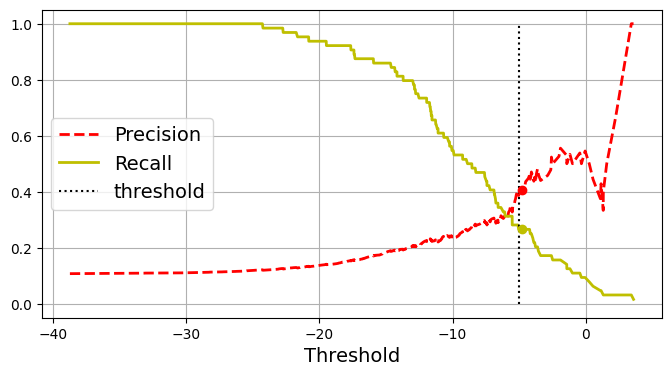

In [86]:
plt.figure(figsize=(8, 4))
plt.plot(thresholdsH, precisionsH[:-1], "r--", label="Precision", linewidth=2)
plt.plot(thresholdsH, recallsH[:-1], "y-", label="Recall", linewidth=2)
plt.vlines(thresholdH, 0, 1.0, "k", "dotted", label="threshold")
idxH = (thresholdsH >= thresholdH).argmax()
plt.plot(thresholdsH[idxH], precisionsH[idxH], "ro")
plt.plot(thresholdsH[idxH], recallsH[idxH], "yo")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()


## We chose to return the threshold for the first value of the precision when it's greater than or equal 0.40 because it's close to the threshold above .

In [87]:
idx_for_40_precision = (precisionsH >=0.40).argmax()
threshold_for_40_precision = thresholdsH[idx_for_40_precision]
threshold_for_40_precision

-5.102511749697417

## The code below shows the Tradeoff between precision and recall for the "heavy" class and the threshold for this class .
* We represent the range of 50 samples [200-250] to print the values of precision , recall, threshold.

In [88]:
testheavy_scores = cross_val_predict(sgd_clf, Traffic_test, Traffic_test_heavy, cv=3,method="decision_function")
precisionsh, recallsh, thresholdsh = precision_recall_curve(Traffic_test_heavy, testheavy_scores)
print("Precisions : ",precisionsh[200:250],"\n\n","Recalls : ", recallsh[200:250],"\n\n", "Thresholds : ",thresholdsh[200:250])

Precisions :  [0.3459596  0.34683544 0.34771574 0.34860051 0.3494898  0.35038363
 0.35128205 0.35218509 0.35309278 0.35400517 0.35492228 0.35584416
 0.35677083 0.35770235 0.35863874 0.35958005 0.36052632 0.36147757
 0.36243386 0.36339523 0.3643617  0.36533333 0.36631016 0.36729223
 0.36827957 0.36927224 0.37027027 0.37127371 0.37228261 0.373297
 0.37431694 0.37534247 0.37637363 0.37741047 0.37845304 0.37950139
 0.38055556 0.3816156  0.38268156 0.3837535  0.38483146 0.38591549
 0.38700565 0.38810198 0.38920455 0.39031339 0.39142857 0.39255014
 0.39367816 0.39481268] 

 Recalls :  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.] 

 Thresholds :  [-166.19991602 -166.1542474  -165.12300938 -163.61757056 -163.3817466
 -162.71262172 -161.74764888 -161.57524707 -161.2962604  -160.09939966
 -159.37076626 -159.3414494  -159.10547432 -159.0900168  -158.78494248
 -158.32343907 -158.24049328 -1

## We decided to take the value 10 for the threshold because the precision starts to be higher than recall at this point 

In [89]:
thresholdh =10
label_scores_predh = (testheavy_scores > thresholdh)
label_scores_predh=pd.DataFrame(label_scores_predh)

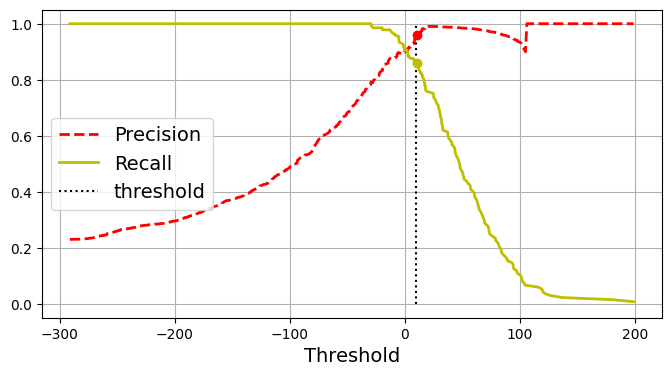

In [90]:
plt.figure(figsize=(8, 4))
plt.plot(thresholdsh, precisionsh[:-1], "r--", label="Precision", linewidth=2)
plt.plot(thresholdsh, recallsh[:-1], "y-", label="Recall", linewidth=2)
plt.vlines(thresholdh, 0, 1.0, "k", "dotted", label="threshold")
idxh = (thresholdsh >= thresholdh).argmax()
plt.plot(thresholdsh[idxh], precisionsh[idxh], "ro")
plt.plot(thresholdsh[idxh], recallsh[idxh], "yo")
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center left")
plt.show()


## We chose to return the threshold for the first value of the precision when it's greater than or equal 0.96 because it's close to the threshold above .

In [91]:
idx_for_96_precision = (precisionsh >=0.96).argmax()
threshold_for_96_precision = thresholdsh[idx_for_96_precision]
threshold_for_96_precision

10.246289012163786

## **The table below gives the summary between all classes (best_score , best_params, best_estimator)**
* We concluded that the best classifier is Support Vector Machine.

|  | best_score | best_params | best_estimator |
| :---------:|----------|----------|----------|
| svm_clf | 0.936972120665394 | 'C': 10, 'gamma': 'auto', 'kernel': 'rbf' | C=10, gamma='auto', random_state=42 |
| log_reg | 0.8987382247901717 | 'n_jobs': -1, 'C': 50 | C=50, max_iter=1000, n_jobs=-1 |
| knn_clf | 0.882356958398582 | 'weights': 'distance', 'n_neighbors': 7, 'leaf_size': 20, 'algorithm': 'auto' | leaf_size=20, n_neighbors=7, weights='distance' |
| forest_clf | 0.9222621743784564 | 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 500 ,'random_state': 42 | max_depth=4, n_estimators=500, random_state=42 |
| gpc | 0.9016806375686501 | 'max_iter_predict': 300,'multi_class': 'one_vs_one','n_jobs': -1, 'random_state': 100 | max_iter_predict=300, multi_class='one_vs_one , n_jobs=-1, random_state=100 |
| tree_clf | 0.8495642497376816 | splitter':'random','min_samples_split': 6,'max_depth': 6,'criterion': 'gini' | max_depth=6, min_samples_split=6, random_state=42,splitter='random' | 


## **The table below gives the summary about recall , precision , f1_score for all classes between all classifiers**

|  | svm_clf | log_reg | knn_clf | forest_clf | gpc | tree_clf |
| ---------|----------|----------|----------|----------|----------|----------|
| recall class_0 | 0.97080292 | 0.97810219 | 0.93430657 | 1.  | 0.96350365 | 0.91240876 |
| recall class_1 | 0.84375 | 0.65625 | 0.640625 | 0.640625 | 0.625   | 0.796875   |
| recall class_2 | 0.83606557 | 0.6557377 | 0.52459016 |  0.67213115 | 0.57377049| 0.44262295 |
| recall class_3 | 0.95808383 | 0.92814371 | 0.95508982 | 0.99700599 | 0.97305389 | 0.88323353 |
| precision class_0 | 0.97080292 | 0.96402878 | 0.90140845 | 0.99275362 | 0.89795918| 0.93283582 |
| precision class_1 | 0.84375 | 0.77777778 | 0.80392157 | 1.   | 0.86956522 | 0.65384615 |
| precision class_2 | 0.91071429 | 0.75471698 | 0.88888889 | 1.   | 0.92105263 | 0.72972973|
| precision class_3 | 0.9439528 | 0.88571429 | 0.86920981 |  0.8856383  |  0.89041096 | 0.85014409 |
| F_1score  class_0 | 0.97080292 | 0.97101449 | 0.91756272 | 0.99636364 | 0.92957746 | 0.92250923 |
| F_1score  class_1 | 0.84375 | 0.71186441 | 0.71304348 | 0.78095238 | 0.72727273 | 0.71830986 |
| F_1score  class_2 | 0.87179487 | 0.70175439 | 0.65979381 |  0.80392157 | 0.70707071 | 0.55102041 |
| F_1score  class_3 | 0.95096582 | 0.90643275 | 0.91012839 | 0.93802817 | 0.92989986 | 0.86637298 |


In [92]:
joblib.dump(svm_clf,'best_model.pkl')


['best_model.pkl']

In [93]:
final_model_reloaded = joblib.load('best_model.pkl')